In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

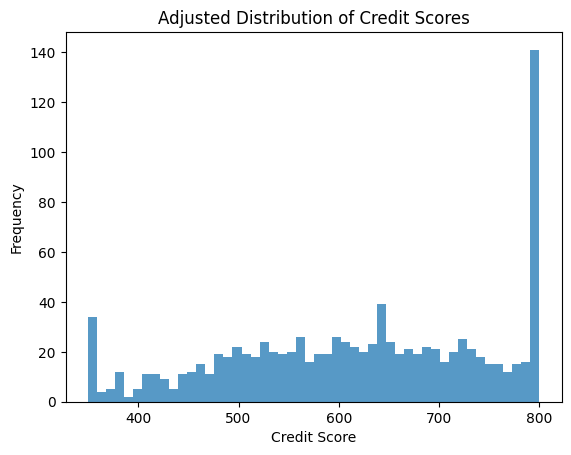

In [ ]:
import matplotlib.pyplot as plt
np.random.seed(42)
n_customers = 1000

data = {
    'user_id': np.arange(1, n_customers + 1),
    'age': np.random.randint(18, 70, n_customers),
    'income': np.random.randint(10000, 150000, n_customers),
    'loan_amount': np.random.randint(5000, 50000, n_customers),
    'on_time_return': np.random.choice([0, 1], p=[0.5, 0.5], size=n_customers),  # Balanced likelihood of return status
    'frequency_owing': np.random.randint(0, 10, n_customers),
    'frequency_lending': np.random.randint(0, 10, n_customers),
    'debt_to_income_ratio': np.random.uniform(0.2, 1.0, n_customers),  # Include more high-risk ratios
    'total_debt': np.random.randint(10000, 100000, n_customers),  # Increased debt amounts
    'recent_payments': np.random.choice([0, 1, 2, 3, 4, 5], p=[0.3, 0.2, 0.2, 0.1, 0.1, 0.1], size=n_customers)  # Increased variability with a tilt towards fewer payments
}

df = pd.DataFrame(data)

# Apply a revised credit score formula
df['credit_score'] = np.clip(
    800 - df['debt_to_income_ratio'] * 350  # Further increased weight
    - (df['debt_to_income_ratio']**2) * 100  # Increase non-linear penalty
    + (df['on_time_return'] * 20)  # Further reduced benefit
    + (80 * np.log(df['income'] / 10000 + 1))  # Reduced impact of income
    + (df['frequency_lending'] * 5)  # Unchanged
    - (df['frequency_owing'] * 30)  # Increased penalty
    + (df['recent_payments'] * 8),  # Slightly reduced benefit
    350, 800
)

plt.hist(df['credit_score'], bins=50, alpha=0.75)
plt.title('Adjusted Distribution of Credit Scores')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()


In [ ]:
df.to_csv('Customer_Credit_Scores.csv', index=False)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('Customer_Credit_Scores.csv')

# Define features and target variable
features = [
    'age', 'income', 'loan_amount', 'on_time_return', 'frequency_owing',
    'frequency_lending', 'debt_to_income_ratio', 'total_debt', 'recent_payments'
]
X = df[features]
y = df['credit_score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
predictions = model.predict(X_test_scaled)

# Calculate metrics
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Assign predictions back to the DataFrame for comparison
df.loc[X_test.index, 'predicted_credit_score'] = predictions

# Filter test set rows only to avoid NaN in the output
df_test_predictions = df.loc[X_test.index, ['user_id', 'credit_score', 'predicted_credit_score']]

# Output a sample of the data to verify
print(df_test_predictions.sample(50))  # Show a random sample of test data
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


     user_id  credit_score  predicted_credit_score
363      364    732.785229              708.792040
314      315    749.179257              732.186965
941      942    654.130016              654.664563
139      140    645.422141              653.185550
371      372    688.076693              645.682541
30        31    542.324583              512.866142
867      868    800.000000              789.412391
277      278    800.000000              797.186638
589      590    800.000000              800.000000
218      219    350.000000              360.604704
494      495    800.000000              799.060030
947      948    513.355579              486.102856
107      108    757.848851              754.079964
542      543    628.466078              631.556982
254      255    739.401955              720.733110
548      549    606.496781              593.336905
595      596    613.107889              627.056769
837      838    418.640582              466.049694
901      902    486.413832     